# Basic Testing

Now that we have completed our neural network, first we must check that it can actually learn somnething. We will see if we can get the network to learn an XOR gate

The XOR gate has the following truth table:

| X1 | X2 | Y |
| --- |:---:| ---:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

This translates into training examples as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
np.random.seed(1)

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([0, 1, 1, 0]).reshape((1, 4))

## Reference Network (pyTorch)

In order to compare the validity of the results, we implement a network first using pyTorch to check how the results are.

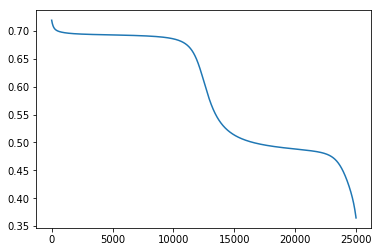

tensor([[ 0.0231],
        [ 0.8247],
        [ 0.6206],
        [ 0.5347]])
Time taken: 0:00:04.879911


In [2]:
import torch
from torch import nn
from torch import optim
from torch import tensor

tss = datetime.now()
# Create Tensors to hold inputs and outputs
# Note that the pyTorch inputs are of size (num_training_examples, input_size) which are the opposite to our network
# So, we just translate the results
x = tensor(X.T).type(torch.float)
y = tensor(Y.T).type(torch.float)

# Use the nn package to a basic model and binary cross entropy loss function.
model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Tanh(),
    nn.Linear(2, 2),
    nn.Tanh(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)
loss_fn = nn.BCELoss()

# Use the optim package to define an SGD Optimizer that will update the weights of
# the model for us.
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
costs = []

# Train for 25,000 epochs.
for t in range(25000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    cost = loss_fn(y_pred, y)
    costs.append(cost.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    cost.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

# Plot the cost over training.
plt.plot(costs)
plt.show()

# Print the final trained network predictions for our input set
print(model(x))

print('Time taken: {}'.format(datetime.now() - tss))

## Test Network (Potatolemon)

Now let's recreate the same network using our potatolemon library and see how it goes!

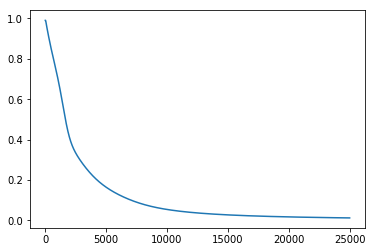

[[ 0.00324411]
 [ 0.99917027]
 [ 0.99924255]
 [ 0.02033314]]
Time taken: 0:00:06.122180


In [33]:
import sys
sys.path.insert(0, '../')

from src import network

tss = datetime.now()

# Set up our network, specifying input dimensions and hidden layers
plnn = network.Network(2, [3, 3], learning_rate=0.01, activation=network.tanh)

# Fit our network
costs = plnn.fit(X, Y, epochs=25000, verbose=False)

# Plot the costs
plt.plot(costs)
plt.show()

# Get the final prediction
np.set_printoptions(suppress=True)
print(plnn.predict(X).T)

print('Time taken: {}'.format(datetime.now() - tss))